# Goals Today 
- Learn about Spark ⚡
- Learn about the Twin Cities 🏢
- Get hands on 🥊

# ⛏️ Minneapolis Parcel Data Mining 👩🏻‍💻
#### Every year, the Minneapolis Assessing Department works to revalue the building and land of every property.
#### To help them do that, they consider many factors such as year built, building use, building features, and recent sales.

#### By analyzing this data, we unlock insights such as neighborhood amenity mix, the age of our housing stock, as well as what drives property value.
#### Understanding these issues better can help inform discussion about zoning, public health, and access to housing.

In [0]:
html="""
<iframe width="560" height="315"
    src="https://www.youtube.com/embed/P4uSTusFsjI?rel=0&controls=1"
    frameborder="0"
    allow="autoplay; encrypted-media"
    allowfullscreen>
</iframe>
"""

# Here is a brief overview of the assessing process from the City of Minneapolis

**Note:** Embedded video only works inside Databricks.  
Click [here](https://www.youtube.com/watch?v=P4uSTusFsjI) to watch on YouTube.


In [0]:
displayHTML(html)


## Cliff Notes Version
####Minneapolis dropping by buildings to check things out and what they are worth, they are crunching some numbers arent sharing all the logic in that process. 

### Ingest Data

In [0]:
import pandas as pd
import numpy as np
url='https://raw.githubusercontent.com/Twin-Cities-Data/Datasets/refs/heads/main/Assessing_Department_Parcel_Data_2024_Trim.csv'
df=pd.read_csv(url)

### Interactive Viewing 

In [0]:
df.display()

PIN HOUSE_NO PLAT_NO NEIGHBORHOOD COMMUNITY WARD ZONING LANDUSE PARCEL_AREA_SQFT X Y PRIMARY_PROP_TYPE LANDVALUE BLDGVALUE TOTALVALUE NUM_BLDGS BUILDINGUSE YEARBUILT BELOWGROUNDAREA ABOVEGROUNDAREA TOTAL_UNITS p0102824110112 2815 19720 LONGFELLOW LONGFELLOW 2.0 CM3 VACANT 6988.0 539527.7245 157256.5448 VACANT LAND - COMMERCIAL 125800 0 125800 0 null null 0 0 0.0 p0102824110113 3016 19720 LONGFELLOW LONGFELLOW 2.0 CM3 MULTI-FAMILY APARTMENT 15700.0 539581.9071 157137.0452 APARTMENT 235500 2360500 2596000 1 APARTMENT 6+ UNIT 1961.0 5133 10266 26.0 p0102824110114 3020 19720 LONGFELLOW LONGFELLOW 2.0 CM3 1 UNIT RESIDENTIAL - SINGLE FAMILY HOUSE 7841.0 539581.7985 157062.0552 RESIDENTIAL 104000 221000 325000 1 SINGLE FAMILY HOUSE 1910.0 795 1609 1.0 p0102824110115 3024 19720 LONGFELLOW LONGFELLOW 2.0 CM3 1 UNIT RESIDENTIAL - SINGLE FAMILY HOUSE 8472.0 539581.7276 157012.0545 RESIDENTIAL 107000 128000 235000 1 SINGLE FAMILY HOUSE 1910.0 755 1267 1.0 p0102824110122 2727 19720 LONGFELLOW LONGFELLOW 2.0 CM3 INSTITUTIONS:SCHL,COLLEGE,CHURCH OR HOSPITAL 43340.0 539189.267 157216.6756 COMMERCIAL 0 0 0 1 LIBRARY 1976.0 1836 15780 0.0 p0102824110123 2730 19720 LONGFELLOW LONGFELLOW 2.0 CM3 INSTITUTIONS:SCHL,COLLEGE,CHURCH OR HOSPITAL 49963.0 539189.9135 156980.953 COMMERCIAL 0 0 0 1 CHURCH 1923.0 17640 35280 0.0 p0102824110124 2800 19890 LONGFELLOW LONGFELLOW 2.0 CM3 MULTI-FAMILY APARTMENT 45901.0 539386.9751 156970.4318 APARTMENT 688500 14484500 15173000 1 APARTMENT 6+ UNIT 1978.0 13576 95032 120.0 p0102824110125 3131 20680 LONGFELLOW LONGFELLOW 2.0 RM1 MIXED OFFICE,RETAIL,RESIDENTIAL, ETC 32650.0 539179.2259 156462.801 COMMERCIAL 587700 1052300 1640000 1 COM ORIG W 1-3 UNIT RES 1961.0 8091 12285 1.0 p0102824110126 3026 19830 LONGFELLOW LONGFELLOW 2.0 UN2 2 UNIT RESIDENTIAL - DUPLEX 6345.0 539990.2966 157008.2487 2 UNIT RESIDENTIAL 96000 216000 312000 1 DUPLEX 1920.0 936 1368 2.0 p0102824110127 3029 18430 LONGFELLOW LONGFELLOW 2.0 UN2 1 UNIT RESIDENTIAL - SINGLE FAMILY HOUSE 12534.0 539819.4919 156947.3083 RESIDENTIAL 125000 448000 573000 1 SINGLE FAMILY HOUSE 1991.0 1883 1931 1.0 p0102824110130 2805 7816 LONGFELLOW LONGFELLOW 2.0 CM3 MULTI-FAMILY APARTMENT 28588.0 539349.9947 157214.424 APARTMENT 428800 2659200 3088000 1 APARTMENT 6+ UNIT 2003.0 0 26051 24.0 p0102824110131 2813 7816 LONGFELLOW LONGFELLOW 2.0 CM3 VACANT 18692.0 539444.7997 157193.0384 VACANT LAND - COMMERCIAL 336500 0 336500 0 null null 0 0 0.0 p0102824110134 3124 31714 LONGFELLOW LONGFELLOW 2.0 UN2 2 UNIT RESIDENTIAL - DUPLEX 7433.0 539581.0851 156512.0976 2 UNIT RESIDENTIAL 130000 264000 394000 1 DUPLEX 1960.0 1679 1679 2.0 p0102824120001 2716 18430 LONGFELLOW LONGFELLOW 2.0 CM3 RETAIL 5642.0 539037.7651 156894.1264 COMMERCIAL 90300 589700 680000 1 SMALL RETAIL STORE 1932.0 4830 4830 0.0 p0102824120009 3140 18590 LONGFELLOW LONGFELLOW 9.0 RM1 MULTI-FAMILY APARTMENT 9000.0 539045.9576 156241.7 APARTMENT 135000 823000 958000 1 APARTMENT 6+ UNIT 1962.0 1512 3024 11.0 p0102824120010 3146 18590 LONGFELLOW LONGFELLOW 9.0 RM1 MULTI-FAMILY APARTMENT 12600.0 539079.726 156178.4142 APARTMENT 189000 1509000 1698000 1 APARTMENT 6+ UNIT 1961.0 3978 7956 null p0102824120011 3152 18590 LONGFELLOW LONGFELLOW 9.0 RM1 OFFICE STRUCTURE 6940.0 539131.0933 156126.1175 COMMERCIAL 0 0 0 1 CLINIC MED/DENT/VET 1965.0 2182 2508 0.0 p0102824120012 2710 18590 LONGFELLOW LONGFELLOW 9.0 RM1 VACANT 2175.0 538998.0625 156155.9688 VACANT LAND - COMMERCIAL 0 0 0 0 null null 0 0 0.0 p0102824120017 3149 18590 LONGFELLOW LONGFELLOW 9.0 PR2 VACANT 6680.0 538800.0 156144.4531 VACANT LAND - COMMERCIAL 0 0 0 0 null null 0 0 0.0 p0102824120029 3037 20840 LONGFELLOW LONGFELLOW 9.0 PR2 VACANT 4000.0 537843.375 156976.9219 VACANT LAND - COMMERCIAL 0 0 0 0 null null 0 0 0.0 p0102824120030 3045 20840 LONGFELLOW LONGFELLOW 9.0 PR2 VACANT 3200.0 537848.8125 156932.3594 VACANT LAND - COMMERCIAL 0 0 0 0 null null 0 0 0.0 p0102824120031 3047 20840 LONGFELLOW LONGFELLOW 9.0 PR2 VACANT 3200.0 537863.875 156897.6719 VACANT L

In [0]:
df=df.drop_duplicates(['X','Y']).reset_index()

# Some Initial Questions
- Can we see trends in building?
- What types of property account for the most "built environment" space in Minneapolis?
- How does neighborhood impact "built environment" distribution?
- How do neighboring buildings impact the value of parcels?

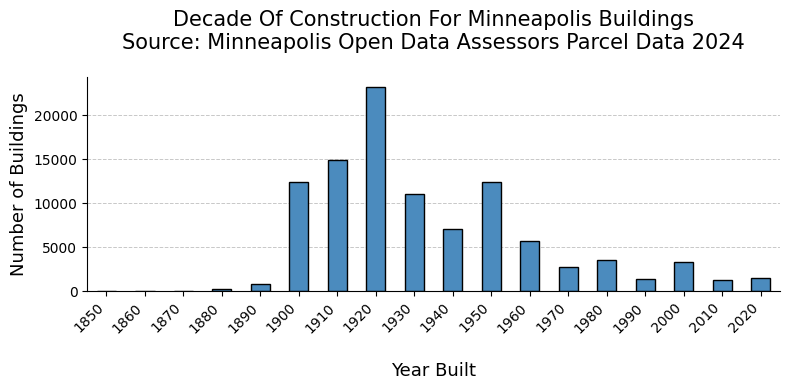

In [0]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))
summary = (
    round(df.query("YEARBUILT>1700")["YEARBUILT"].astype(int), -1)
    .value_counts()
    .sort_index()
)
bars = summary.plot(
    kind="bar", edgecolor="black", grid=True, zorder=2, ax=ax, color="#4B8BBE"
)
ax.set_xlabel("\nYear Built", fontsize=13)
ax.set_ylabel("Number of Buildings", fontsize=13)
ax.set_title(
    "Decade Of Construction For Minneapolis Buildings\nSource: Minneapolis Open Data Assessors Parcel Data 2024",
    fontsize=15,
    pad=20,
)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.yaxis.grid(True, linestyle="--", linewidth=0.7, alpha=0.7)
ax.xaxis.grid(False)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

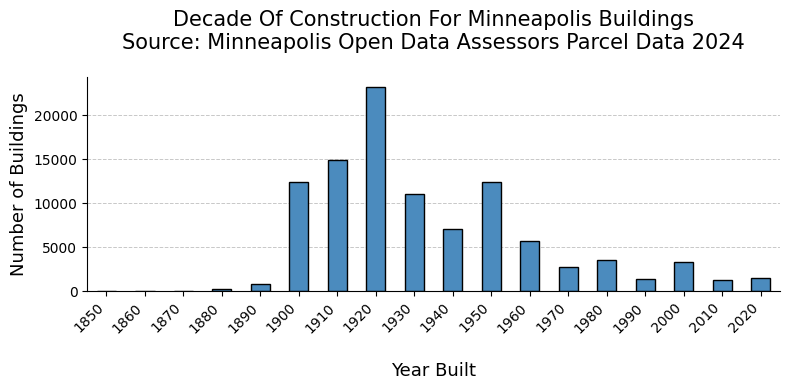

In [0]:
fig


#####<br>That's a cool chart and pandas is very powerful. So why use Databricks notebooks, or PySpark? What does that buy us?

#####Consider a deceptively complex question: "How do neighboring buildings impact parcel values?" To answer this question, we need to perform nearest neighbor search. The simplest way to do this is by computing pairwise distance for Minneapolis's 133k properties.

#####That operation creates a grid of 133k x 133k values, each with 8 bytes—almost 40GB of data, more than we can fit into RAM.

In [0]:
#from scipy.spatial.distance import pdist, squareform
#import pandas as pd
##Convert df to numpy for distance matric function
#coords = df[['X', 'Y']].dropna().to_numpy()
##pdist gets matrix
#dist_matrix = pdist(coords, metric='euclidean')



#####<br>And we have successfully crashed Python! But fret not. We are using Databricks, so we can easily benefit from Spark.

In [0]:
from pyspark.sql import functions as F

In [0]:
# Turn pandas DF to spark DF
df_spark = spark.createDataFrame(df.dropna(subset = ['PIN', 'X', 'Y',"BUILDINGUSE","BLDGVALUE"]))

# Aliasing for cross join
df1 = df_spark.selectExpr("PIN as PIN1", "X as X1", "Y as Y1","BUILDINGUSE as B1USE","BLDGVALUE AS BLDGVALUE")
df2 = df_spark.selectExpr("PIN as PIN2", "X as X2", "Y as Y2")

# Filter to avoid self-pairing
df_cross = df1.crossJoin(df2).filter("PIN1 != PIN2")

# Compute Euclidean distance
df_cross = df_cross.withColumn(
    "dist",
F.sqrt((F.col("X1") - F.col("X2"))**2 + (F.col("Y1") - F.col("Y2"))**2)
)
# Get the nearest neighbor distance per parcel and convert to pandas to cache the result
nearest_neighbors = df_cross.\
    groupBy("PIN1", "B1USE", "BLDGVALUE").agg(
    F.min("dist").alias("nearest_dist"),
    F.min_by("PIN2", "dist").alias("nearest_PIN")
).toPandas()


In [0]:
df2=df.dropna(subset = ['PIN', 'X', 'Y',"BUILDINGUSE","BLDGVALUE"]).\
    rename(columns={'PIN':'nearest_PIN',"BUILDINGUSE":'B2USE'})[['nearest_PIN','B2USE']]

# 🏡 Nimby Analysis Time! 🏢 
##### Does being next door to a larger apartment building decrease your home value?

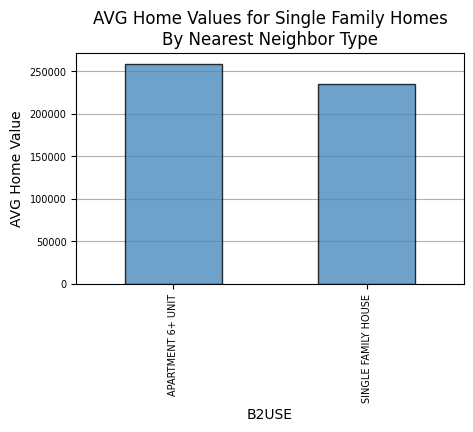

In [0]:
nearest_neighbors.merge(df2,on='nearest_PIN').\
    query('B1USE=="SINGLE FAMILY HOUSE"').\
    query('B2USE=="APARTMENT 6+ UNIT" | B2USE=="SINGLE FAMILY HOUSE"').\
    groupby('B2USE')['BLDGVALUE'].\
    agg(['mean','size']).\
    sort_values('mean',ascending=False)['mean'].\
    plot(kind='bar',
         edgecolor='black',
         grid=True,color='#4B8BBE',
         zorder=2,
         alpha=.8,
         figsize=(5,3),
         fontsize=7,
         ylabel='AVG Home Value',
         title='AVG Home Values for Single Family Homes\nBy Nearest Neighbor Type').xaxis.grid(False)

In [0]:
#del df_spark,df_cross, df1, df2,nearest_neighbors

In [0]:
#import gc
#gc.collect()

### 
#<br> How did all the work? 
### Why did spark get the job done in 3 minutes while scipy crashed? 

In [0]:
displayHTML("""
<img src="https://runawayhorse001.github.io/LearningApacheSpark/_images/work_flow.png" width="560" />
""")

# Go here for more  <br> 
##### 👉[https://runawayhorse001.github.io/LearningApacheSpark/introduction.html](https://runawayhorse001.github.io/LearningApacheSpark/introduction.html)

In [0]:
displayHTML("""
<img src="https://raw.githubusercontent.com/Twin-Cities-Data/Notebooks/main/Images/Spark%20Meetup/WantsToCook.png
" width="760" />
""")

In [0]:
displayHTML("""
<img src="https://raw.githubusercontent.com/Twin-Cities-Data/Notebooks/main/Images/Spark%20Meetup/TwoCooks.png
" width="760" />
""")

In [0]:
displayHTML("""
<img src="https://raw.githubusercontent.com/Twin-Cities-Data/Notebooks/main/Images/Spark%20Meetup/BagToDag.png
" width="960" />
""")

###<br> 🤔 Is this enough evidence to convert Nimbies to Yimbies? 🏡➡️🏢
### <br>🔍 What can we do to more conclusively answer this question? 📊
##### 🤝 Meet us at Twin Cities Data Science & Analytics to explore deeper!
##### 📅 August 13 | 🕕 6:00–8:00 PM | 📍 Improving, Minneapolis



#<br> Make sure to RSVP!!👇
# [https://lnkd.in/gGdg25wK]()

# 🫡
##### Signing Off, 
##### Data Dan 

In [0]:
nearest_neighbors

PIN1                 B1USE  ...  nearest_dist     nearest_PIN
0       p0102824110020   SINGLE FAMILY HOUSE  ...     42.666030  p0102824110019
1       p0102824110027   SINGLE FAMILY HOUSE  ...     43.219356  p0102824110026
2       p0102824110030   SINGLE FAMILY HOUSE  ...     43.143040  p0102824110031
3       p0102824110034   SINGLE FAMILY HOUSE  ...     40.001013  p0102824110033
4       p0102824110035   SINGLE FAMILY HOUSE  ...     41.156012  p0102824110034
...                ...                   ...  ...           ...             ...
101276  p3602924440169   SINGLE FAMILY HOUSE  ...     47.822068  p3602924440170
101277  p3602924440171   SINGLE FAMILY HOUSE  ...     48.031706  p3602924440170
101278  p3602924440177   SINGLE FAMILY HOUSE  ...     28.783076  p3602924440176
101279  p3602924440187  STORE / SUPER MARKET  ...     79.929391  p3602924430090
101280  p3602924440191       REST./CAFETERIA  ...     67.870371  p3602924440114

[101281 rows x 5 columns]

In [0]:
import pandas as pd
import numpy as np
salesurl='https://raw.githubusercontent.com/Twin-Cities-Data/Datasets/refs/heads/main/Property_Sales_2019_to_2023.csv'
dfSales=pd.read_csv(salesurl)

dfSales['PIN']=dfSales['PIN'].str.replace('-','')
df['PIN']=df['PIN'].str.replace('p','')

soldbuildings=df.merge(dfSales[['PIN','GROSS_SALE_PRICE']],on='PIN')
soldbuildings['TotalArea']=soldbuildings['BELOWGROUNDAREA']+soldbuildings['ABOVEGROUNDAREA']
soldbuildings['BLDGDollarsPerArea']=soldbuildings['GROSS_SALE_PRICE']/soldbuildings['TotalArea']
HoodBuildingMeans=soldbuildings.groupby(['NEIGHBORHOOD','BUILDINGUSE'])['BLDGDollarsPerArea'].median().reset_index()

soldbuildings=soldbuildings.merge(
            HoodBuildingMeans.rename(columns={'BLDGDollarsPerArea':'HoodDollarsPerArea'}),
            on=['NEIGHBORHOOD','BUILDINGUSE']
            )
soldbuildings['HoodDelta']=(soldbuildings['BLDGDollarsPerArea']-soldbuildings['HoodDollarsPerArea'])

/home/spark-c893deaf-0bc9-4dfc-9f3e-77/.ipykernel/2650/command-8703978049599619-3540336248:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dfSales=pd.read_csv(salesurl)


In [0]:
nearest_neighbors.assign(CleanPin=lambda x: x.PIN1.str.replace('p','')).\
    merge(soldbuildings[['PIN','HoodDelta']].rename(columns={'PIN':'CleanPin'}),on='CleanPin').\
    merge(df2,on='nearest_PIN').\
    query('B1USE=="SINGLE FAMILY HOUSE"').\
    groupby('B2USE')['HoodDelta'].\
    agg(['median','size']).\
    sort_values('median',ascending=False)

median   size
B2USE                                       
MORTUARY                   999.226670      1
CO-OP (MASTER PARCEL)      104.276860      1
VEHICLE/EQUIP REP. MAINT.   36.219557      3
RES OUTBUILDING/MISC        35.594920      1
RES DETACHED GARAGE         34.913982      9
MISC. STRUCTURE             30.545118      1
COM USE W SF MODEL          21.952330      2
APARTMENT 6+ UNIT           10.858605     41
TOWNHOUSE                    8.306770      7
CLINIC MED/DENT/VET          7.391136      2
OFFICE                       1.295095     15
SERV. STATION W/STORE        1.143754      1
APARTMENT 4 OR 5 UNIT        0.429254     69
SINGLE FAMILY HOUSE          0.221234  22422
CHURCH                       0.116385     13
LABORATORY                   0.000000      1
APARTMENT CONVERTED         -0.612380     25
FRAT/SOC CLUB UNION         -1.698884      1
DUPLEX                      -3.941610   1772
TRIPLEX                     -4.290840     78
RES ZERO LOT LINE           -4.819090     19
BOARDING OR LODGING         -5.678215      4
RETAIL & MULTI-TENANT       -6.622637      2
COM ORIG W 1-3 UNIT RES     -9.586664      7
SF HOUSE W/ADU             -10.019535     27
RESIDENTIAL CARE FACILITY  -12.005331      1
COM CONV W 1-3 UNIT RES    -13.894201     10
TRANSIENT NAL HSG FAC      -14.366160      1
CONDOMINIUM                -14.505088     41
DUPLEX W/ADU               -14.685779      4
FRATERNITY OR SORORITY     -20.824766      1
STORE & OFFICE             -22.091214      4
GROUP HOME                 -22.496547      9
COMMERCIAL                 -23.653587      2
DAY CARE CENTER            -27.858537      2
BAR/FOOD                   -29.482629      1
SMALL RETAIL STORE         -29.632147     12
WORKSHOP                   -30.884587     10
PRIVATE GARAGE             -41.875946      2
CONVENT                    -49.314409      3
TELEPHONE EXCHANGE         -80.289436      1
CARRIAGE HOUSE             -83.953445      7

In [0]:
SizeFilteredDF=nearest_neighbors.assign(CleanPin=lambda x: x.PIN1.str.replace('p','')).\
    merge(soldbuildings[['PIN','HoodDelta']].rename(columns={'PIN':'CleanPin'}),on='CleanPin').\
    merge(df2,on='nearest_PIN').\
    query('B1USE=="SINGLE FAMILY HOUSE"').\
    assign(B2Size=lambda x:x.groupby(['B2USE']).transform('size')).\
    query('B2Size>=30')

In [0]:
SizeFilteredDF[['B2USE','HoodDelta']]

B2USE  HoodDelta
0                   DUPLEX -78.265361
1      SINGLE FAMILY HOUSE   0.483778
2      SINGLE FAMILY HOUSE -86.245567
3      SINGLE FAMILY HOUSE  71.677345
4      SINGLE FAMILY HOUSE  73.253039
...                    ...        ...
32720  SINGLE FAMILY HOUSE -53.494281
32721               DUPLEX  -6.534489
32722               DUPLEX  17.903438
32723               DUPLEX -25.147413
32724               DUPLEX   6.614000

[24423 rows x 2 columns]

In [0]:
pip install plotnine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 79.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Not uninstalling pandas at /databricks/python3/lib/python3.12/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-c893deaf-0bc9-4dfc-9f3e-77eab36fc084
    Can't uninstall 'pandas'. No files were found to uninstall.
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.2
    Not uninstalling statsmodels at /databricks/python3/lib/python3.12/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-c893deaf-0bc9-4dfc-9f3e-77eab36fc084
    Can't uninstall 'statsmodels'. No files were found to uninstall.
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to

In [0]:
from plotnine import *

/local_disk0/.ephemeral_nfs/envs/pythonEnv-c893deaf-0bc9-4dfc-9f3e-77eab36fc084/lib/python3.12/site-packages/plotnine/layer.py:480: PlotnineWarning: stat_bin : Removed 458 rows containing non-finite values.


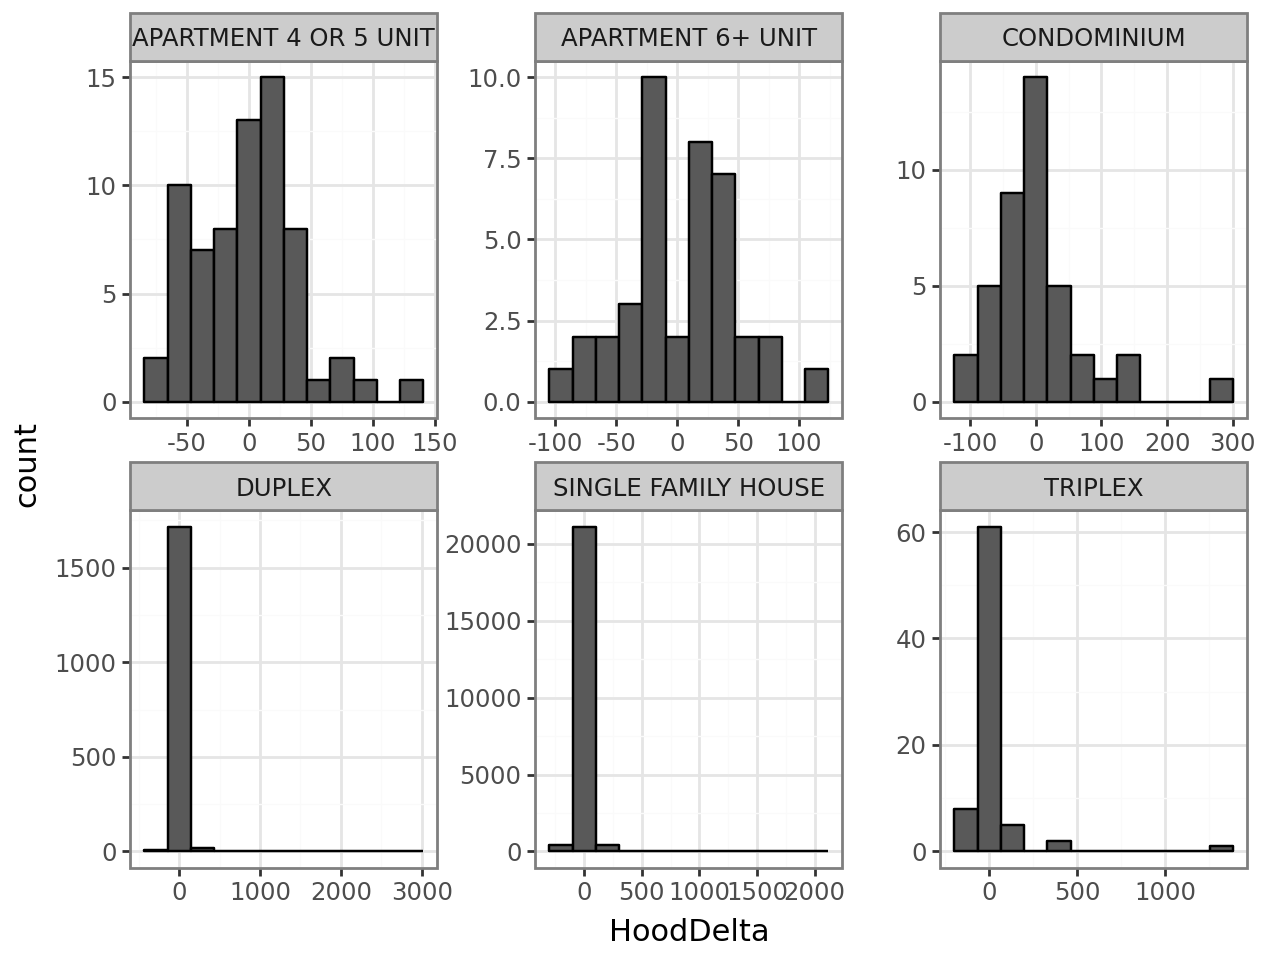

In [0]:
ggplot(SizeFilteredDF[['B2USE','HoodDelta']], aes(x="HoodDelta"))+\
     geom_histogram(bins=12,color='black')+\
     facet_wrap("B2USE",scales='free')+\
    theme_bw()

# We see right skewed fat tails, some people are coming out way ahead

# After removing outliers

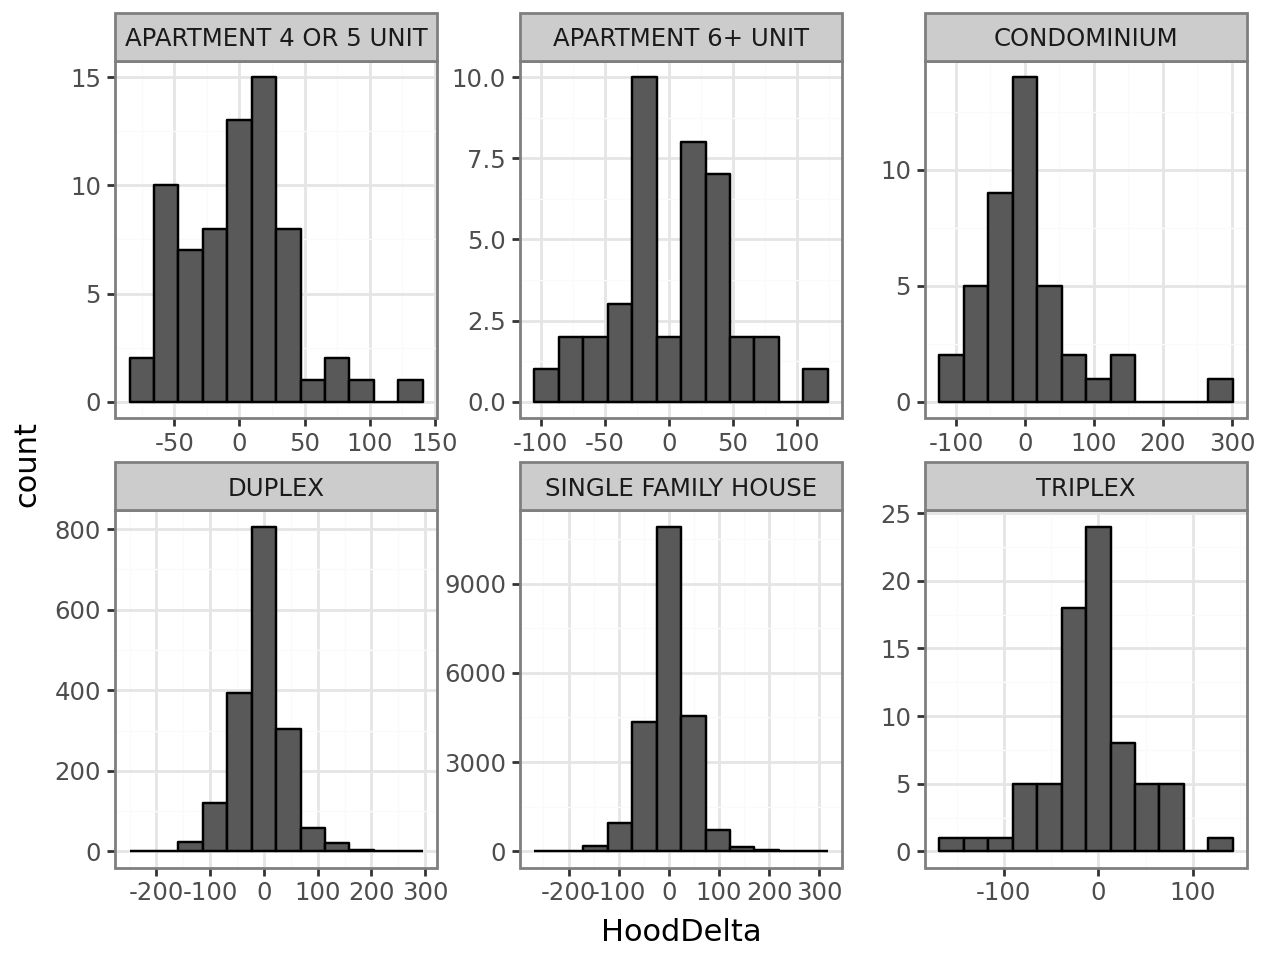

In [0]:
ggplot(SizeFilteredDF[['B2USE','HoodDelta']].query("HoodDelta<300"), aes(x="HoodDelta"))+\
     geom_histogram(bins=12,color='black')+\
     facet_wrap("B2USE",scales='free')+\
    theme_bw()

# Goals Today
- [ ] ✅ Learn about Spark
- [ ] ✅ Learn about the Twin Cities 
- [ ] 👉 Get hands on

In [0]:
# Back to pyspark

In [0]:
# Some basic operations

In [0]:
salesurl='https://raw.githubusercontent.com/Twin-Cities-Data/Datasets/refs/heads/main/Property_Sales_2019_to_2023.csv'
import pandas as pd
dfSales=pd.read_csv(salesurl)


/home/spark-b83feb1a-fca0-4f2c-9cfd-b6/.ipykernel/20173/command-4858905521350093-405657591:3: DtypeWarning:

Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.



In [0]:
dfSalesSpark.\
    withColumn('SALE_DATE', F.substring('SALE_DATE', 0, 10)).\
    withColumn('SALE_DATE', F.to_date('SALE_DATE', 'yyyy/MM/dd')).\
    withColumn('SALE_DATE', F.date_format('SALE_DATE', 'yyyy/MM')).\
    withColumn('Dummy', F.lit(1)).\
    groupBy(['SALE_DATE']).\
    pivot('COMMUNITY_DESC').sum('Dummy').\
    orderBy('SALE_DATE').\
    toPandas().\
    set_index('SALE_DATE').\
    plot()

In [0]:
dfSalesSpark.\
    withColumn('SALE_DATE', F.substring('SALE_DATE', 0, 10)).\
    withColumn('SALE_DATE', F.to_date('SALE_DATE', 'yyyy/MM/dd')).\
    withColumn('SALE_Q', F.date_format('SALE_DATE', 'yyyy/QQ')).\
    withColumn('SALE_DATE', F.date_format('SALE_DATE', 'yyyy/MM')).\
    withColumn('Dummy', F.lit(1)).\
    groupBy(['SALE_Q']).\
    pivot('COMMUNITY_DESC').sum('Dummy').\
    orderBy('SALE_Q').\
    toPandas().\
    set_index('SALE_Q').\
    plot()

In [0]:
from pyspark.sql import functions as F

In [0]:
0/10

0.0

In [0]:
dfSalesSpark.filter('GROSS_SALE_PRICE<=0').count()

3

In [0]:
# Make new column by using withColumn, it's like assign in pandas
dfSalesSpark.filter('GROSS_SALE_PRICE>0').\
    withColumn('PercentDown',dfSalesSpark['DOWNPAYMENT']/dfSalesSpark['GROSS_SALE_PRICE']).\
    withColumn('Dummy',F.lit(1)).\
    groupBy('PROPTYPE_DESC').\
    agg(
        F.mean('PercentDown').alias('PercentDown'),
        F.sum('Dummy').alias('Count')
        ).\
    display()

PROPTYPE_DESC PercentDown Count RESIDENTIAL MISC 0.3314682179432456 262 TOWNHOUSE 0.2988667176904243 334 MED/CARE FACILITY 0.16221392532084844 6 APARTMENT 0.2549510978351972 1151 CONDOMINIUM 0.32642448123863566 7534 2 UNIT RESIDENTIAL 0.20502771693430105 3455 COMMERCIAL 0.3205478910490914 1233 RES - ZERO LOT LINE 0.26261956938742564 74 COOPERATIVE 0.2499991335029357 4 INDUSTRIAL 0.24604387738531955 137 VACANT LAND - INDUSTRIAL 0.42150932728754736 93 VACANT LAND - APARTMENT 0.22427452854756644 76 3 UNIT RESIDENTIAL 0.23363199942717833 292 RESIDENTIAL 0.19363415781208235 24003 VACANT LAND - COMMERCIAL 0.345520394148282 248 VACANT LAND - RESIDENTIAL 0.4620931835395759 326 CONDO - GAR/MISC 0.3615950516243346 3697 RES LAKE SHORE 1.0 1 COMMON AREA (NO VALUE) 0.41934830543078805 5 VACANT LAND - LAKESHORE 1.0 1 SORORITY/FRATERNITY HOUSE 0.0041025641025641026 3

In [0]:
dfSalesSpark.\
    filter('GROSS_SALE_PRICE>0').\
    filter('PROPTYPE_DESC=="RESIDENTIAL"').\
    withColumn('PercentDown',dfSalesSpark['DOWNPAYMENT']/dfSalesSpark['GROSS_SALE_PRICE']).\
    withColumn('Dummy',F.lit(1)).\
    groupBy('NBHD_DESC').\
    agg(
        F.mean('PercentDown').alias('PercentDown'),
        F.sum('Dummy').alias('Count'),
        F.mean('GROSS_SALE_PRICE').alias('MeanPrice')
        ).\
    display()

NBHD_DESC PercentDown Count MeanPrice MINNEHAHA 0.19812750273927454 443 308328.99774266366 EAST HARRIET 0.238413663621421 206 598636.7281553398 KENNY 0.18489699491680073 449 423809.4498886414 EAST BDE MAKA SKA 0.2889256240657705 113 726643.6814159292 STANDISH 0.17650884950073836 721 291832.7295423024 HIAWATHA 0.20728939478666808 502 325307.73107569723 COOPER 0.1968047878785312 358 356129.21508379886 PAGE 0.2033468313451428 171 466032.83625730994 MARSHALL TERRACE 0.16472202088319865 97 257483.76288659795 PROSPECT PK/E RIVER RD 0.2205859559360563 142 479078.44366197183 VENTURA VILLAGE 0.32246220125947356 46 245974.36956521738 CENTRAL 0.15232854108318855 310 281615.30967741937 ST ANTHONY WEST 0.24581418303158134 55 449784.5272727273 SOUTH UPTOWN 0.2211146172871946 164 408925.3475609756 EAST PHILLIPS 0.2363414031422722 126 202894.62698412698 STEVENS SQ/LORING HGTS 0.32467449932986997 7 369469.14285714284 WAITE PARK 0.18431586319241053 728 293025.14285714284 KEEWAYDIN 0.20004740054666884 334 357861.9550898204 FIELD 0.2145107306012897 285 363696.46315789473 SHINGLE CREEK 0.10893444606363974 381 229747.5905511811 BELTRAMI 0.2745871628117322 73 262138.19178082192 MIDTOWN PHILLIPS 0.19173940084411667 126 225974.67460317462 FOLWELL 0.1655154683643926 761 191438.1944809461 LOWRY HILL 0.34697635546762307 158 1107309.0759493671 WENONAH 0.12510794818910434 445 291057.33483146067 HOWE 0.20487084651804224 711 325887.1504922644 LYNDALE 0.21178969388154895 172 341342.8604651163 DIAMOND LAKE 0.15857546534116673 606 385335.04620462045 KENWOOD 0.4260915724015648 121 1171789.6198347108 BANCROFT 0.16405978304841823 330 291963.94242424244 MARCY-HOLMES 0.4256577793945443 56 463452.3214285714 AUDUBON PARK 0.16629648059798502 485 309297.2618556701 WHITTIER 0.2899799734960778 110 415458.6818181818 TANGLETOWN 0.21535884839413444 377 528560.3978779841 WINDOM PARK 0.21646651694246077 361 322225.7894736842 COLUMBIA 0.17638190560102043 183 262987.12021857925 LOGAN PARK 0.18350546702775905 74 307339.04054054053 LYNNHURST 0.25965463621039836 545 667611.0568807339 ELLIOT PARK 0.1 2 350000.0 BOTTINEAU 0.25126591481423227 78 319615.6282051282 EAST ISLES 0.2780617576750754 84 1024495.630952381 WINDOM 0.14315637798548042 309 355089.3754045307 HALE 0.2148853619908586 375 434897.576 COMO 0.27381582178097247 295 341588.3288135593 HARRISON 0.2115164239588857 104 233367.6923076923 LIND-BOHANON 0.13386271403341837 695 215136.27194244604 HAWTHORNE 0.19071028162190914 307 191223.51140065148 NORTHROP 0.17199765906774542 450 354927.1311111111 PHILLIPS WEST 0.25987580167704594 26 543457.6923076923 LINDEN HILLS 0.2929403609803907 686 762760.4737609329 WILLARD-HAY 0.17410401916135076 706 223432.23087818697 BRYANT 0.15179364117448702 231 279825.7056277056 CEDAR RSIDE/WEST BANK 0.165 6 261277.66666666666 REGINA 0.1464064579884586 224 298474.23660714284 LONGFELLOW 0.21236057301309008 356 295625.2724719101 NORTHEAST PARK 0.1810361594895557 60 277628.61666666664 WEBBER-CAMDEN 0.15776544871096143 631 193548.23137876386 ARMATAGE 0.1978388751425792 615 418112.6325203252 LORING PARK 0.5712636646471263 4 662500.0 POWDERHORN PARK 0.19976370061913445 377 255169.3474801061 SEWARD 0.24305820489406513 258 335583.57751937985 NEAR NORTH 0.18778125166222173 244 216898.42213114753 ST ANTHONY EAST 0.2143078400043521 77 334247.0 CORCORAN 0.17331289176124595 233 261990.9871244635 MCKINLEY 0.1659838708288421 418 180039.2966507177 CLEVELAND 0.11635365898160545 520 216139.8923076923 ERICSSON 0.20994267055302804 329 340093.0972644377 LOWRY HILL EAST 0.17265541446724 90 467813.5 KING FIELD 0.18814626877406881 573 377201.04363001743 JORDAN 0.16895043903324655 808 190608.59777227722 HOLLAND 0.1937985850564893 248 268659.77419354836 FULTON 0.2708199650379672 654 623802.3669724771 SUMNER-GLENWOOD 0.12156178659402818 7 420128.5714285714 SHERIDAN 0.24135675110438307 109 312920.6605504587 BRYN MAWR 0.23043386445867314 297 515266.76767676766 CEDAR-ISLES-DEAN 0.3445930494488988 117 937483.3931623931 MORRIS PARK 0.

In [0]:
pd.options.plotting.backend = "plotly"

In [0]:
pd.options.plotting.backend = "plotly"
dfSalesSpark.\
    filter('GROSS_SALE_PRICE>0').\
    filter('PROPTYPE_DESC=="RESIDENTIAL"').\
    withColumn('PercentDown',dfSalesSpark['DOWNPAYMENT']/dfSalesSpark['GROSS_SALE_PRICE']).\
    withColumn('Dummy',F.lit(1)).\
    groupBy('NBHD_DESC').\
    agg(
        F.mean('PercentDown').alias('MeanPercentDown'),
        F.sum('Dummy').alias('Count'),
        F.mean('GROSS_SALE_PRICE').alias('MeanPrice')
        ).\
    filter('Count>20').\
    select('NBHD_DESC','MeanPercentDown','MeanPrice').\
    withColumn('MeanPercentDown',F.col('MeanPercentDown')*100).\
    toPandas().\
    plot.scatter(
        x='MeanPrice',
        y='MeanPercentDown',
        s=40,
        title='Mean Percent Down VS Neighborhood Mean Sale Price',
        hover_name='NBHD_DESC',
        trendline="ols"
    ).\
    update_yaxes(tickprefix="%").\
    update_xaxes(tickprefix="$")

# Who can show me count vs mean percent down first?

# Who can show me count vs mean percent down first?

# Who can show me median price for per year quarter for minneapolis residential sales?

In [0]:
dfSalesSpark.\
    filter('PROPTYPE_DESC=="RESIDENTIAL"').\
    withColumn('SALE_DATE', F.substring('SALE_DATE', 0, 10)).\
    withColumn('SALE_DATE', F.to_date('SALE_DATE', 'yyyy/MM/dd')).\
    withColumn('SALE_Q', F.date_format('SALE_DATE', 'yyyy/QQ')).\
    withColumn('SALE_DATE', F.date_format('SALE_DATE', 'yyyy/MM')).\
    withColumn('Dummy', F.lit(1)).\
    groupBy(['SALE_Q']).\
    agg(F.median('GROSS_SALE_PRICE')).\
    orderBy('SALE_Q').\
    toPandas().set_index('SALE_Q').plot()

In [0]:
dfSalesSpark.\
    filter('GROSS_SALE_PRICE>0').\
    filter('PROPTYPE_DESC=="RESIDENTIAL"').\
    withColumn('SALE_DATE', F.substring('SALE_DATE', 0, 10)).\
    withColumn('SALE_DATE', F.to_date('SALE_DATE', 'yyyy/MM/dd')).\
    withColumn('SALE_Q', F.date_format('SALE_DATE', 'yyyy/QQ')).\
    withColumn('SALE_DATE', F.date_format('SALE_DATE', 'yyyy/MM')).\
    withColumn('PercentDown',dfSalesSpark['DOWNPAYMENT']/dfSalesSpark['GROSS_SALE_PRICE']).\
    withColumn('Dummy', F.lit(1)).\
    groupBy(['SALE_Q']).\
    agg(F.mean('PercentDown')).\
    orderBy('SALE_Q').\
    toPandas().set_index('SALE_Q').plot()